In [47]:
import pandas as pd
df = pd.read_csv('oil_prices.csv')
df.head()

,Unnamed: 0,Date,Price Per Barell,Exrates,PMS,AGO,Kero
0,0,14/01/2010,89.15,80.568005,94.03,87.45,75.83
1,1,14/01/2011,89.17,81.029071,95.67,88.71,77.51
2,2,14/02/2011,88.58,81.473400,98.08,91.72,79.52
3,3,14/03/2011,102.86,84.205509,102.44,94.53,83.97
4,4,14/04/2011,109.53,83.889816,111.17,107.52,90.91


C:\Users\Maria\Anaconda\lib\site-packages\pandas\plotting\_matplotlib\core.py:203: UserWarning: 'colors' is being deprecated. Please use 'color'instead of 'colors'
  "'colors' is being deprecated. Please use 'color'"


<Figure size 432x288 with 0 Axes>

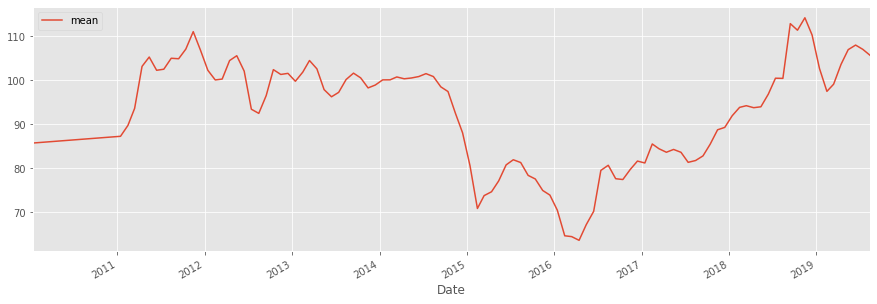

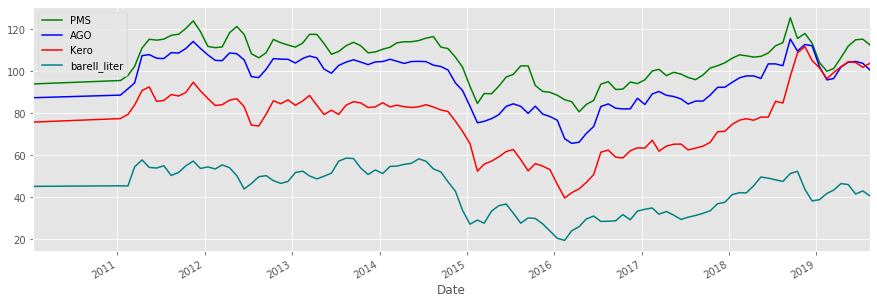

,Unnamed: 0,Date,Price Per Barell,Exrates,PMS,AGO,Kero,mean,mean_geo,barell_liter
0,0,2010-01-14,89.15,80.568005,94.03,87.45,75.83,85.770000,85.431986,45.177431
1,1,2011-01-14,89.17,81.029071,95.67,88.71,77.51,87.296667,86.969457,45.446162
2,2,2011-02-14,88.58,81.473400,98.08,91.72,79.52,89.773333,89.434484,45.393022
3,3,2011-03-14,102.86,84.205509,102.44,94.53,83.97,93.646667,93.336710,54.478433
4,4,2011-04-14,109.53,83.889816,111.17,107.52,90.91,103.200000,102.808138,57.793621


In [78]:
# do some manipulation
import matplotlib.pyplot as plt
plt.style.use('ggplot')
df['Date'] = pd.DatetimeIndex(df.Date)
df['mean'] = df[['PMS','AGO','Kero']].mean(axis = 1)
df['mean_geo'] = [(i[0]*i[1]*i[2])**0.333333 for i in zip(df.PMS,df.AGO,df.Kero)]
barell = 158.987294928
df['barell_liter'] = (df['Price Per Barell']* df.Exrates)/barell
plt.figure()
df.plot(x = 'Date',y = 'mean',kind = 'line',figsize = (15,5))
df[['PMS','AGO','Kero','barell_liter','Date']].plot(x = 'Date',kind = 'line',figsize = (15,5),colors = ['green','blue','red','teal'])
plt.show()
df.head()

In [55]:
from sklearn.ensemble import RandomForestRegressor as RFR
from sklearn.metrics import mean_absolute_error as mae
from sklearn.model_selection import train_test_split

In [61]:
x = df[['Price Per Barell','Exrates']]
y = df.mean_geo#[["PMS","AGO","Kero"]]
print(df.shape)
df = df.dropna()
print(df.shape)
x_train,x_test,y_train,y_test =train_test_split(x,y,random_state =1,test_size =0.2)
model =RFR()
model.fit(x_train,y_train)

(105, 9)
(105, 9)


C:\Users\Maria\Anaconda\lib\site-packages\sklearn\ensemble\forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=10,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [62]:

mae(y_test,model.predict(x_test))

4.591630477273788

In [63]:
y_test.head()

65     65.306290
35     97.631523
42     99.987068
93    112.314944
38     99.341601
Name: mean_geo, dtype: float64

In [65]:
model.predict(x_test)[0:5]

array([ 74.61853827,  99.6853238 ,  99.70473668, 103.85535087,
       103.32249399])